<a href="https://colab.research.google.com/github/Mercury1565/Linear-Regression-Exercises/blob/main/Linear_Regression_Manual_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import csv
import random

num_students = 200

# Generate random student data with a positive correlation between study time and exam score, with outliers
student_data = []
for i in range(num_students):
  study_time = random.randint(2, 45)  # Hours studying (2-45 hours)
  exam_score = int(70 + 0.5 * study_time + random.gauss(0, 5))  # Base score + bonus for study time + random noise
  exam_score = max(0, exam_score)  # Limit scores to 0-100 (clip to 0 at the lower bound)

  # Introduce outliers (low score with high study time, high score with low study time)
  if random.random() < 0.1:  # 10% chance of outlier
    if random.random() < 0.5:  # 50% chance of low score outlier
      exam_score = int(exam_score * 0.75)  # Reduce score by 25%
    else:
      exam_score = min(100, int(exam_score * 1.25))  # Increase score by 25% and clip to 100 at upper bound

  student_data.append({"study_time": study_time, "score": exam_score})

# Write data to CSV file
with open("student_study_time_vs_exam_score.csv", "w", newline="") as csvfile:
  fieldnames = ["study_time", "score"]
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  writer.writerows(student_data)

print("CSV file generated successfully: student_study_time_vs_exam_score.csv")

CSV file generated successfully: student_study_time_vs_exam_score.csv


In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('/content/sample_data/student_study_time_vs_exam_score.csv')
print(data)

     study_time  score
0            21     84
1            15     82
2             5     64
3             6     73
4            18     93
..          ...    ...
195          21     84
196           4     68
197          35    100
198          15     75
199          13     86

[200 rows x 2 columns]


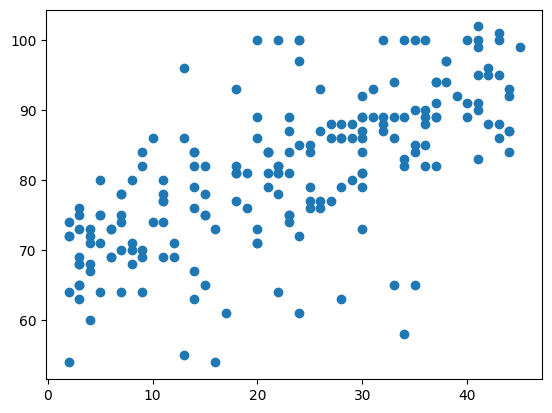

In [28]:
plt.scatter(data.study_time , data.score)
plt.show()

In [48]:
def mean_square_error(slope , y_intercept , points):
  error = 0
  for i in range(len(points)):
    x = points.iloc[i].study_time
    y = points.iloc[i].score

    error += (y - (slope*x + y_intercept)) ** 2

  error /= len(points)

  return error

In [34]:
def gradient_decent(current_slope , current_yInt , points, learning_rate):
  intercept_gradient = 0
  slope_gradient = 0

  n = len(points)

  for i in range(n):
     x = points.iloc[i].study_time
     y = points.iloc[i].score

     slope_gradient += (-2/n) * ((x)*(y - (current_slope * x) - current_yInt))
     intercept_gradient += (-2/n) * (y - (current_slope * x) - current_yInt)

  slope = current_slope - (slope_gradient) * learning_rate
  yInt = current_yInt - (intercept_gradient) * learning_rate

  return slope , yInt


0
Mean Square Error 6683.84
3.85011 0.16207999999999995
2.5212722276 0.14981086799999993
2.977937069364976 0.19762974157647992
2.819030015991909 0.22471172655803007
2.872349167270514 0.2589221463820797
2.8525015908095988 0.2906541197286883
2.8578797877587765 0.3232197395846371
2.854561809420452 0.35547713369877115
2.8542426380913395 0.3878199856455692
2.852890293550349 0.4201125784325495
2.851894847096627 0.45240171200720863
2.8507770552998277 0.48467126149442663
2.849702142519339 0.5169267960718855
2.848613145419213 0.5491664056378677
2.8475297024314776 0.5813907586536435
2.846445042646275 0.6135996345864334
2.8453615000787855 0.6457931193896489
2.8442782697165456 0.6779711933473085
2.8431956287631945 0.710133873169426
2.842113481316063 0.7422811630029907
20
Mean Square Error 1142.0723567495975
2.8410318601053395 0.7744130713214987
2.839950753513712 0.8065296051020944
2.838870165213339 0.8386307718330704
2.8377900936053186 0.8707165788217613
2.836710538908167 0.9027870334331574
2.8356

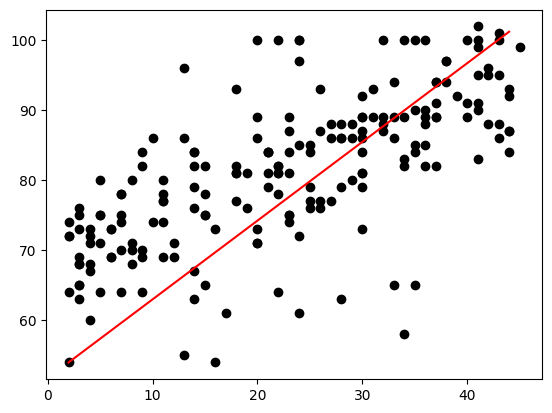

In [54]:
slope = 0
yInt = 0
learning_rate = 0.001
epochs = 3000

for i in range(epochs):
  if i % 50 == 0:
    mse = mean_square_error(slope , yInt , data)

    print(f"Epoch i")
    print(f"Mean Square Error {mse}")
  slope , yInt = gradient_decent(slope , yInt , data , learning_rate)
  print(slope , yInt)

print(slope , yInt)
plt.scatter(data.study_time , data.score , color = 'black')
plt.plot(list(range(2,45)) , [slope * x + yInt for x in range(2,45)] , color = 'red')
plt.show()